In [1]:
from __future__ import print_function
import lsst.sims.maf.plots as plots
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import lsst.sims.maf.metricBundles as mb
import lsst.sims.maf.plots as plots
import lsst.sims.maf.runComparison as rc

Loading BokehJS ...

# Setup

In [3]:
colors = {'baseline2018a':'b','nexus_2020': 'r'}
runlist = list(colors.keys())

In [4]:
runlist

['baseline2018a', 'nexus_2020']

In [5]:
comp = rc.RunComparison(baseDir='.',runlist=runlist)

In [6]:
all_dict = comp.buildMetricDict(subdir='all')

In [7]:
srd_dict = comp.buildMetricDict(subdir='srd')

In [8]:
cadence_dict = comp.buildMetricDict(subdir='cadence')

In [9]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    comp.addSummaryStats(all_dict)

In [10]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    comp.addSummaryStats(srd_dict)

In [11]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    comp.addSummaryStats(cadence_dict)

In [12]:
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format

# fO summary metrics

In [13]:
comp.summaryStats.T.filter(like='fO',axis=0)

,baseline2018a,nexus_2020
fOArea: Nvisits (#) fO All visits HealpixSlicer,836.000,754.000
fOArea: Nvisits/benchmark fO All visits HealpixSlicer,1.013,0.914
fONv: Area (sqdeg) fO All visits HealpixSlicer,18056.563,17894.580
fONv: Area/benchmark fO All visits HealpixSlicer,1.003,0.994
fOArea: Nvisits (#) fO WFD HealpixSlicer,835.000,529.000
fOArea: Nvisits/benchmark fO WFD HealpixSlicer,1.012,0.641
fONv: Area (sqdeg) fO WFD HealpixSlicer,18040.617,17526.969
fONv: Area/benchmark fO WFD HealpixSlicer,1.002,0.974


# Rapid revist uniformity

In [14]:
comp.summaryStats.T.filter(like='RapidRevisitUniformity',axis=0).dropna()

,baseline2018a,nexus_2020
Area (sq deg) RapidRevisitUniformity All visits HealpixSlicer,2853.932,616.400
Max RapidRevisitUniformity All visits HealpixSlicer,0.993,0.913
Mean RapidRevisitUniformity All visits HealpixSlicer,0.401,0.385
Median RapidRevisitUniformity All visits HealpixSlicer,0.426,0.373
Min RapidRevisitUniformity All visits HealpixSlicer,0.076,0.092
N(+3Sigma) RapidRevisitUniformity All visits HealpixSlicer,194.000,55.000
N(-3Sigma) RapidRevisitUniformity All visits HealpixSlicer,0.000,0.000
RapidRevisitUniformity All visits HealpixSlicer,22535.000,8098.000
Rms RapidRevisitUniformity All visits HealpixSlicer,0.134,0.101
Area (sq deg) RapidRevisitUniformity WFD HealpixSlicer,1971.007,596.816


# Rapid revist N

In [15]:
comp.summaryStats.T.filter(like='RapidRevisitN',axis=0).dropna()

,baseline2018a,nexus_2020


# Rapid revisit

In [16]:
comp.summaryStats.T.filter(like='RapidRevisits HealpixSlicer',axis=0).dropna()

,baseline2018a,nexus_2020


In [17]:
df_list = []

# Fraction in Pairs

In [18]:
df_list.append(comp.summaryStats.T.filter(like='Median Fraction of visits in pairs',axis=0).dropna())
comp.summaryStats.T.filter(like='Median Fraction of visits in pairs',axis=0).dropna()

,baseline2018a,nexus_2020
Median Fraction of visits in pairs (15-60 min) gri HealpixSlicer,0.895,0.867
Median Fraction of visits in pairs (15-60 min) gri WFD+NES HealpixSlicer,0.901,0.889


# NVisits

In [19]:
nvists = comp.summaryStats.T.filter(like='Nvisits All props',axis=0).dropna()
comp.summaryStats.T.filter(like='Nvisits All props',axis=0).dropna()

,baseline2018a,nexus_2020
Fraction of total Nvisits All props,1.000,1.000
Nvisits All props,2372700.000,2364295.000
Max Nvisits All props OneDSlicer,1084.000,1073.000
Mean Nvisits All props OneDSlicer,737.092,781.585
Median Nvisits All props OneDSlicer,772.000,790.000
Min Nvisits All props OneDSlicer,2.000,123.000
N(+3Sigma) Nvisits All props OneDSlicer,0.000,0.000
N(-3Sigma) Nvisits All props OneDSlicer,10.000,31.000
Nvisits All props OneDSlicer,3219.000,3025.000
Rms Nvisits All props OneDSlicer,237.872,178.082


# Fraction of Total visits per proposal

In [20]:
comp.summaryStats.T.filter(like='Fraction of total',axis=0).dropna()

,baseline2018a,nexus_2020
Fraction of total Nvisits All props,1.000,1.000
Fraction of total Nvisits SouthCelestialPole,0.020,0.036
Fraction of total Nvisits WideFastDeep,0.864,0.842
Fraction of total Nvisits DeepDrillingCosmology1,0.046,0.054
Fraction of total Nvisits GalacticPlane,0.016,0.026
Fraction of total Nvisits NorthEclipticSpur,0.055,0.041


# Median Nvsits per filter WFD 

In [21]:
df_list.append(comp.summaryStats.T.filter(like='Median NVisits WFD',axis=0).dropna())
comp.summaryStats.T.filter(like='Median NVisits WFD',axis=0).dropna()

,baseline2018a,nexus_2020
Median NVisits WFD u band HealpixSlicer,62.000,146.000
Median NVisits WFD i band HealpixSlicer,199.000,115.000
Median NVisits WFD r band HealpixSlicer,200.000,151.000
Median NVisits WFD g band HealpixSlicer,87.000,65.000
Median NVisits WFD all bands HealpixSlicer,912.000,1045.000
Median NVisits WFD z band HealpixSlicer,183.000,310.000
Median NVisits WFD y band HealpixSlicer,182.000,262.000


# Median CoaddedM5 per filter WFD 

In [22]:
df_list.append(comp.summaryStats.T.filter(like='Median CoaddM5 WFD',axis=0).dropna())
comp.summaryStats.T.filter(like='Median CoaddM5 WFD',axis=0).dropna()

,baseline2018a,nexus_2020
Median CoaddM5 WFD u band HealpixSlicer,25.615,26.074
Median CoaddM5 WFD i band HealpixSlicer,26.613,26.304
Median CoaddM5 WFD r band HealpixSlicer,27.188,27.021
Median CoaddM5 WFD g band HealpixSlicer,27.110,26.900
Median CoaddM5 WFD z band HealpixSlicer,25.707,26.155
Median CoaddM5 WFD y band HealpixSlicer,24.892,25.134


# Median seeingEff per filter WFD 

In [23]:
df_list.append(comp.summaryStats.T.filter(like='Median Median seeingEff WFD',axis=0).dropna())
comp.summaryStats.T.filter(like='Median Median seeingEff WFD',axis=0).dropna()

,baseline2018a,nexus_2020
Median Median seeingEff WFD u band HealpixSlicer,0.956,0.948
Median Median seeingEff WFD i band HealpixSlicer,0.823,0.834
Median Median seeingEff WFD r band HealpixSlicer,0.849,0.846
Median Median seeingEff WFD g band HealpixSlicer,0.906,0.921
Median Median seeingEff WFD all bands HealpixSlicer,0.836,0.827
Median Median seeingEff WFD z band HealpixSlicer,0.816,0.803
Median Median seeingEff WFD y band HealpixSlicer,0.806,0.782


# Median airmass

In [24]:
df_list.append(comp.summaryStats.T.filter(like='Median Median airmass WFD',axis=0).dropna())
comp.summaryStats.T.filter(like='Median Median airmass WFD',axis=0).dropna()

,baseline2018a,nexus_2020
Median Median airmass WFD u band HealpixSlicer,1.044,1.050
Median Median airmass WFD i band HealpixSlicer,1.050,1.051
Median Median airmass WFD r band HealpixSlicer,1.045,1.050
Median Median airmass WFD g band HealpixSlicer,1.046,1.052
Median Median airmass WFD all bands HealpixSlicer,1.048,1.051
Median Median airmass WFD z band HealpixSlicer,1.057,1.051
Median Median airmass WFD y band HealpixSlicer,1.079,1.052


# Slew statistics

In [25]:
df_list.append(comp.summaryStats.T.filter(like='slew',axis=0).dropna())
comp.summaryStats.T.filter(like='slew',axis=0).dropna()

,baseline2018a,nexus_2020
Mean slewTime All visits,7.920,7.376
Median slewTime All visits,5.175,4.918
Min slewTime All visits,2.000,2.000
Max slewTime All visits,143.000,140.000


# Filter change statistics

In [44]:
df_list.append(comp.summaryStats.T.filter(like='Filter',axis=0).dropna())
comp.summaryStats.T.filter(like='Filter',axis=0).dropna()

,baseline2018a,nexus_2020
Filter Changes Whole Survey,10644.000,11156.000
Filter Changes Per Night OneDSlicer,3025.000,3025.000
Max Filter Changes Per Night OneDSlicer,23.000,9.000
Mean Filter Changes Per Night OneDSlicer,3.135,2.897
Median Filter Changes Per Night OneDSlicer,2.000,2.000
Min Filter Changes Per Night OneDSlicer,0.000,0.000
N(+3Sigma) Filter Changes Per Night OneDSlicer,59.000,0.000
N(-3Sigma) Filter Changes Per Night OneDSlicer,0.000,0.000
Rms Filter Changes Per Night OneDSlicer,3.471,2.661


# Normalized effective time 

In [45]:
df_list.append(comp.summaryStats.T.filter(like='Normalized Teff WFD all bands',axis=0).dropna())
comp.summaryStats.T.filter(like='Normalized Teff WFD all bands',axis=0).dropna()

,baseline2018a,nexus_2020
Normalized Teff WFD all bands,0.585,0.648
Max Normalized Teff WFD all bands HealpixSlicer,0.736,1.392
Mean Normalized Teff WFD all bands HealpixSlicer,0.584,0.642
Median Normalized Teff WFD all bands HealpixSlicer,0.584,0.658
Min Normalized Teff WFD all bands HealpixSlicer,0.409,0.080
N(+3Sigma) Normalized Teff WFD all bands HealpixSlicer,0.000,32.000
N(-3Sigma) Normalized Teff WFD all bands HealpixSlicer,0.000,110.000
Normalized Teff WFD all bands HealpixSlicer,21495.000,22895.000
Rms Normalized Teff WFD all bands HealpixSlicer,0.070,0.078


# Total effective time

In [46]:
df_list.append(comp.summaryStats.T.filter(like='Total Teff',axis=0).dropna())
comp.summaryStats.T.filter(like='Total Teff',axis=0).dropna()

,baseline2018a,nexus_2020
Total Teff all bands,39733033.842,43611584.428
Total Teff WFD all bands,35942436.837,38699576.321


# Open shutter fraction

In [47]:
df_list.append(comp.summaryStats.T.filter(like='Open',axis=0).dropna())
comp.summaryStats.T.filter(like='Open',axis=0).dropna()

,baseline2018a,nexus_2020
OpenShutterFraction All visits,0.716,0.725
Max OpenShutterFraction Per night OneDSlicer,0.765,0.763
Mean OpenShutterFraction Per night OneDSlicer,0.716,0.726
Median OpenShutterFraction Per night OneDSlicer,0.718,0.726
Min OpenShutterFraction Per night OneDSlicer,0.601,0.639
N(+3Sigma) OpenShutterFraction Per night OneDSlicer,0.000,0.000
N(-3Sigma) OpenShutterFraction Per night OneDSlicer,22.000,13.000
OpenShutterFraction Per night OneDSlicer,3025.000,3025.000
Rms OpenShutterFraction Per night OneDSlicer,0.022,0.015


# HealpixSkyMaps
 - Nvisits all bands
 - Nvisits alt/az all bands
 - Median airmass all bands
 - Max airmass all bands
 - CoaddM5 r band

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/home/docmaf/stack/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/home/docmaf/stack/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/home/docmaf/stack/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/home/docmaf/stack/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/home/docmaf/stack/python/miniconda3-4.3.21/lib/python3.6/site-packages/matp

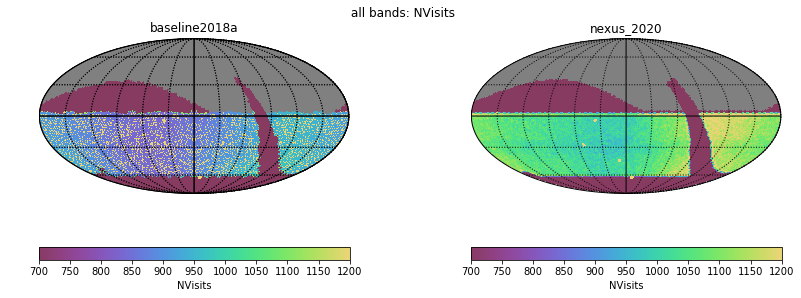

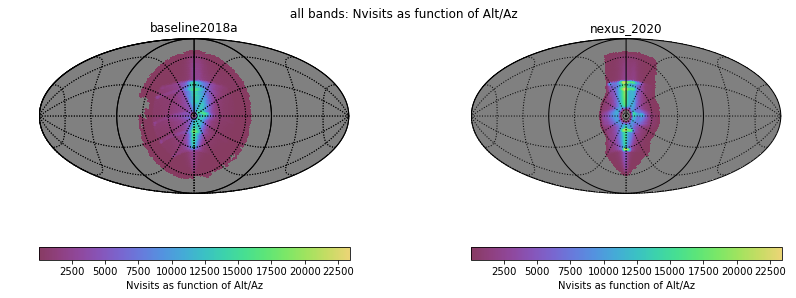

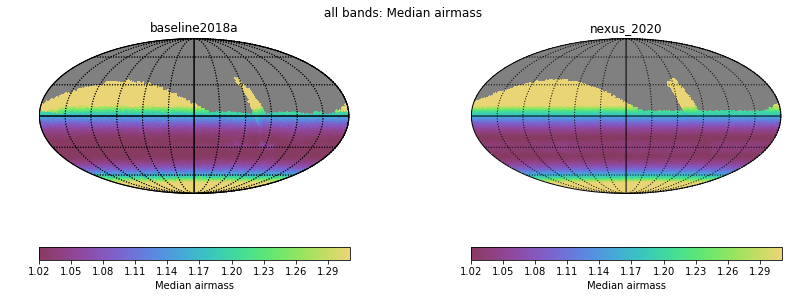

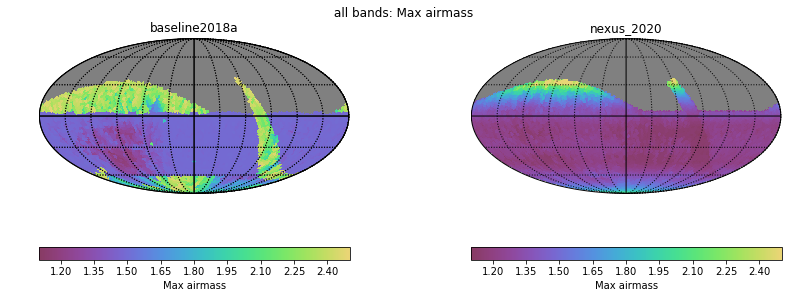

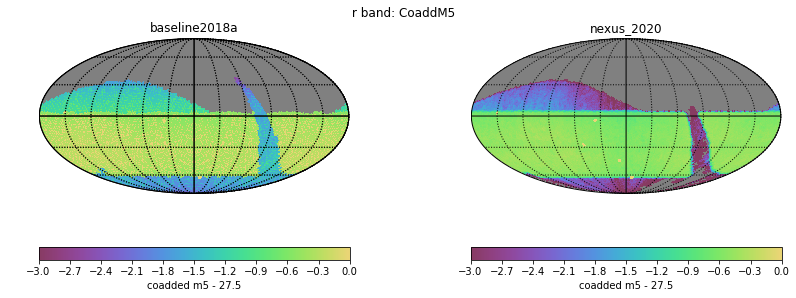

In [48]:
n_visits_all, mname = comp.readMetricData(all_dict['NVisits all bands HealpixSlicer']['metricName'],
                                          all_dict['NVisits all bands HealpixSlicer']['metricMetadata'],
                                          all_dict['NVisits all bands HealpixSlicer']['slicerName'])

n_visits_all_alt_az, mname = comp.readMetricData(all_dict['Nvisits as function of Alt/Az all bands HealpixSlicer']['metricName'],
                                                 all_dict['Nvisits as function of Alt/Az all bands HealpixSlicer']['metricMetadata'],
                                                 all_dict['Nvisits as function of Alt/Az all bands HealpixSlicer']['slicerName'])

med_airmass_all, mname = comp.readMetricData(all_dict['Median airmass all bands HealpixSlicer']['metricName'],
                                             all_dict['Median airmass all bands HealpixSlicer']['metricMetadata'],
                                             all_dict['Median airmass all bands HealpixSlicer']['slicerName'])

max_airmass_all, mname = comp.readMetricData(all_dict['Max airmass all bands HealpixSlicer']['metricName'],
                                             all_dict['Max airmass all bands HealpixSlicer']['metricMetadata'],
                                             all_dict['Max airmass all bands HealpixSlicer']['slicerName'])

coaddM5_r, mname = comp.readMetricData(all_dict['CoaddM5 r band HealpixSlicer']['metricName'],
                                       all_dict['CoaddM5 r band HealpixSlicer']['metricMetadata'],
                                       all_dict['CoaddM5 r band HealpixSlicer']['slicerName'])

with warnings.catch_warnings():
    comp.plotMetricData(n_visits_all,
                        plotFunc=plots.HealpixSkyMap(),
                        userPlotDict={'figsize':(12,4),'colorMin':700,'colorMax':1200, 'xMin':60,'xMax':100},
                        outDir='.',savefig=True)
    comp.plotMetricData(n_visits_all_alt_az,
                        plotFunc=plots.HealpixSkyMap(),
                        userPlotDict={'figsize':(12,4),'xMin':60,'xMax':100,'rot': (90, 90, 90), 'flip': 'geo'},
                        outDir='.',savefig=True)
    comp.plotMetricData(med_airmass_all,
                        plotFunc=plots.HealpixSkyMap(),
                        paramTitles=False,
                        userPlotDict={'figsize':(12,4),'colorMin':1.02,'colorMax':1.31},outDir='.',savefig=True)
    comp.plotMetricData(max_airmass_all,
                        plotFunc=plots.HealpixSkyMap(),
                        paramTitles=False,
                        userPlotDict={'figsize':(12,4),'colorMin':1.1,'colorMax':2.5},outDir='.',savefig=True)
    comp.plotMetricData(coaddM5_r,
                        plotFunc=plots.HealpixSkyMap(),
                        paramTitles=False,
                        userPlotDict={'figsize':(12,4),'colorMin':-3.0,'colorMax':0.0},outDir='.',savefig=True)

In [49]:
coaddM5rBundle = []
for r in runlist:
    coaddM5_r[r].setPlotDict({'color':colors[r],'label':r})
    coaddM5rBundle.append(coaddM5_r[r])
cm5r_ph = plots.PlotHandler()
cm5r_ph.setMetricBundles(coaddM5rBundle)

# CoaddM5 r band HealpixHistrogram

1

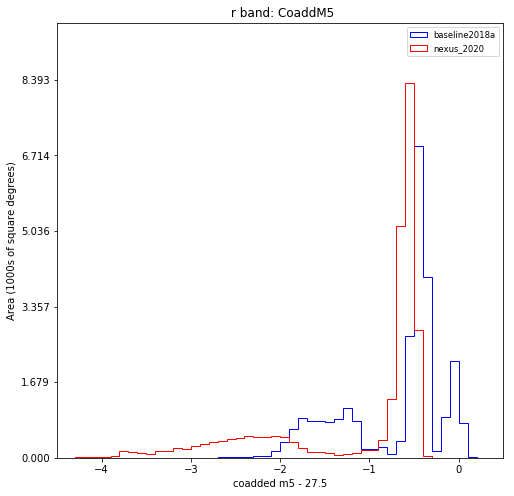

In [50]:
cm5r_ph.plot(plots.HealpixHistogram(),
             plotDicts={'figsize':(8,8),'xMin':-4.5,'xMax':0.5,'yMax':11500,
                        'zp':27.6,'linewidth':3.,'bins':np.arange(-4.5,0.5,0.1)})

# HA distributions (OneDSlicer)

In [51]:
ha_hist_all, mname = comp.readMetricData(all_dict['HA Histogram all bands OneDSlicer']['metricName'],
                                         all_dict['HA Histogram all bands OneDSlicer']['metricMetadata'],
                                         all_dict['HA Histogram all bands OneDSlicer']['slicerName'])

In [52]:
ha_hist_y, mname = comp.readMetricData(all_dict['HA Histogram y band OneDSlicer']['metricName'],
                                       all_dict['HA Histogram y band OneDSlicer']['metricMetadata'],
                                       all_dict['HA Histogram y band OneDSlicer']['slicerName'])

In [53]:
HABundle = []
HABundle_y = []
for r in runlist:
    ha_hist_all[r].setPlotDict({'color':colors[r],'label':r,'bins':np.arange(-10.0,10.1,1)})
    ha_hist_y[r].setPlotDict({'color':colors[r],'label':r})
    HABundle.append(ha_hist_all[r])
    HABundle_y.append(ha_hist_y[r])

In [54]:
ha_ph = plots.PlotHandler()
ha_ph.setMetricBundles(HABundle)

In [55]:
ha_ph_y = plots.PlotHandler()
ha_ph_y.setMetricBundles(HABundle_y)

# HA distribution all bands

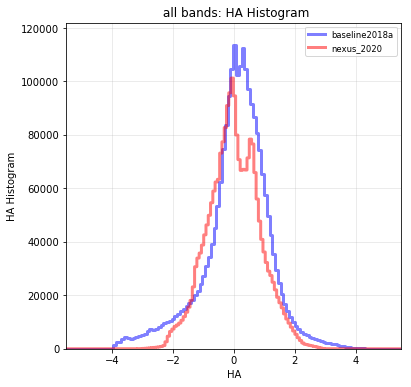

In [56]:
fig = ha_ph.plot(plots.OneDBinnedData(),
                 plotDicts={'figsize':(6,6),'xMin':-5.5,'xMax':5.5,'yMax':122000,
                 'bins':np.arange(-10.0,10.1,1),'linewidth':3,
                 'logScale':False})

# HA distribution y band

1

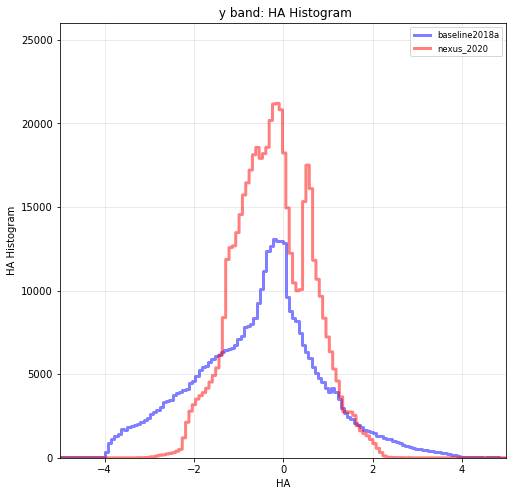

In [57]:
ha_ph_y.plot(plots.OneDBinnedData(),
           plotDicts={'figsize':(8,8),'xMin':-5.0,'xMax':5.0,'yMax':26000,'bins':np.arange(-6.0,6.1,0.1),'linewidth':3})

# Slew time and distance distributions

In [78]:
slew_time_hist,mname = comp.readMetricData(metricName=all_dict['Slew Time Histogram All visits OneDSlicer']['metricName'],
                                           metricMetadata=all_dict['Slew Time Histogram All visits OneDSlicer']['metricMetadata'],
                                           slicerName=all_dict['Slew Time Histogram All visits OneDSlicer']['slicerName'])

# zoom_slew_time_hist,mname = comp.readMetricData(metricName=all_dict['Zoom Slew Time Histogram All visits OneDSlicer']['metricName'],
#                                                 metricMetadata=all_dict['Zoom Slew Time Histogram All visits OneDSlicer']['metricMetadata'],
#                                                 slicerName=all_dict['Zoom Slew Time Histogram All visits OneDSlicer']['slicerName'])

In [79]:
slew_dist_hist,mname = comp.readMetricData(metricName=all_dict['Slew Distance Histogram All visits OneDSlicer']['metricName'],
                                           metricMetadata=all_dict['Slew Distance Histogram All visits OneDSlicer']['metricMetadata'],
                                           slicerName=all_dict['Slew Distance Histogram All visits OneDSlicer']['slicerName'])

# zoom_slew_dist_hist,mname = comp.readMetricData(metricName=all_dict['Zoom Slew Distance Histogram All visits OneDSlicer']['metricName'],
#                                                 metricMetadata=all_dict['Zoom Slew Distance Histogram All visits OneDSlicer']['metricMetadata'],
#                                                 slicerName=all_dict['Zoom Slew Distance Histogram All visits OneDSlicer']['slicerName'])

In [80]:
slew_hist_bundle_list = []
# zoom_slew_hist_bundle_list = []
slew_dist_bundle_list = []
# zoom_slew_dist_bundle_list = []

In [81]:
for r in runlist:
    slew_time_hist[r].setPlotDict({'color':colors[r],'label':r})
    slew_dist_hist[r].setPlotDict({'color':colors[r],'label':r})
    slew_hist_bundle_list.append(slew_time_hist[r])
    slew_dist_bundle_list.append(slew_dist_hist[r])
#     zoom_slew_time_hist[r].setPlotDict({'color':colors[r],'label':r})
#     zoom_slew_dist_hist[r].setPlotDict({'color':colors[r],'label':r})
#     zoom_slew_hist_bundle_list.append(zoom_slew_time_hist[r])
#     zoom_slew_dist_bundle_list.append(zoom_slew_dist_hist[r])

In [82]:
ph_slewhist = plots.PlotHandler()
ph_slewdist = plots.PlotHandler()
# zoom_ph_slewhist = plots.PlotHandler()
# zoom_ph_slewdist = plots.PlotHandler()

In [83]:
ph_slewhist.setMetricBundles(slew_hist_bundle_list)
ph_slewdist.setMetricBundles(slew_dist_bundle_list)
# zoom_ph_slewhist.setMetricBundles(zoom_slew_hist_bundle_list)
# zoom_ph_slewdist.setMetricBundles(zoom_slew_dist_bundle_list)

1

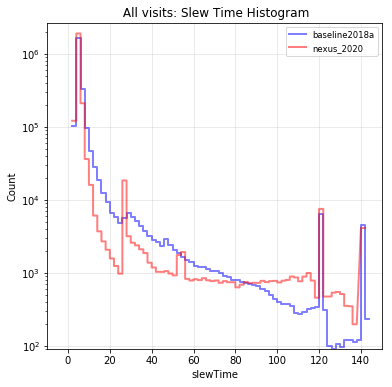

In [84]:
ph_slewhist.plot(plots.OneDBinnedData(),
                       plotDicts={'figsize':(6,6),
                                  'xMin':-10,'xMax':150,
                                  'linewidth':2,'bins':np.arange(0,155,5)})
# zoom_ph_slewhist.plot(plots.OneDBinnedData(),
#                       plotDicts={'figsize':(6,6),
#                                  'xMin':-1,'xMax':20,'yMax':265000,
#                                  'linewidth':2,'bins':np.arange(0,155,5),'logScale':False})

1

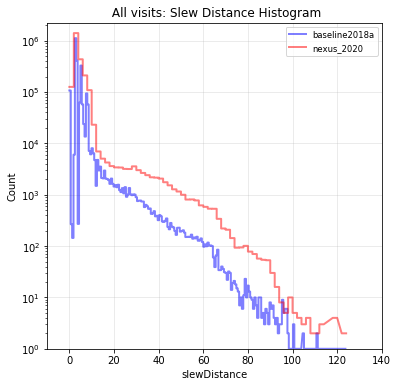

In [85]:
ph_slewdist.plot(plots.OneDBinnedData(),
                        plotDicts={'figsize':(6,6),'xMin':-10,
                                   'xMax':140,
                                   'linewidth':2,'bins':np.arange(0,155,1)})
# zoom_ph_slewdist.plot(plots.OneDBinnedData(),
#                      plotDicts={'figsize':(6,6),'xMin':-1,
#                                 'xMax':10,'yMax':605000,
#                                 'linewidth':2,'bins':np.arange(0,155,1),'logScale':False})

In [86]:
comp.summaryStats.T.to_csv('baseline2018a_nexus_2020.csv')

In [87]:
cols = comp.summaryStats.T.filter(like='Fraction of total',axis=0).dropna().append(df_list).T.columns.values

In [88]:
df_test = comp.summaryStats.T.filter(like='Fraction of total',axis=0).dropna().append(df_list)

In [89]:
df_test['idx'] = cols

In [90]:
new_df = df_test[(df_test['idx'].str.contains('Max|Min|Sigma|Mean|Rms'))==False].round(3)

In [91]:
new_df[runlist]

,baseline2018a,nexus_2020
Fraction of total Nvisits All props,1.000,1.000
Fraction of total Nvisits SouthCelestialPole,0.020,0.036
Fraction of total Nvisits WideFastDeep,0.864,0.842
Fraction of total Nvisits DeepDrillingCosmology1,0.046,0.054
Fraction of total Nvisits GalacticPlane,0.016,0.026
Fraction of total Nvisits NorthEclipticSpur,0.055,0.041
Median Fraction of visits in pairs (15-60 min) gri HealpixSlicer,0.895,0.867
Median Fraction of visits in pairs (15-60 min) gri WFD+NES HealpixSlicer,0.901,0.889
Median NVisits WFD u band HealpixSlicer,62.000,146.000
Median NVisits WFD i band HealpixSlicer,199.000,115.000
